<a href="https://colab.research.google.com/github/WSD2019-teamD/data_reduction/blob/master/colab/visualize_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# visualize lda

wordcloudを利用して、トピックを見やすくする

目的：bowとtfidfで比較をするため

#colabの日本語設定
インストール してランタイムをリスタートする

In [0]:
from pathlib import Path

for fontlist in Path("/root/.cache/matplotlib/").glob("*.json"):
    with open(fontlist) as file:
        for line in file:
            if '"name"' in line:
                print(line.rstrip())

      "name": "STIXSizeOneSym",
      "name": "STIXSizeOneSym",
      "name": "STIXSizeTwoSym",
      "name": "DejaVu Sans Mono",
      "name": "cmex10",
      "name": "cmr10",
      "name": "DejaVu Serif",
      "name": "DejaVu Sans",
      "name": "STIXSizeFiveSym",
      "name": "STIXSizeThreeSym",
      "name": "DejaVu Serif",
      "name": "STIXGeneral",
      "name": "DejaVu Serif Display",
      "name": "DejaVu Sans",
      "name": "STIXNonUnicode",
      "name": "STIXNonUnicode",
      "name": "STIXGeneral",
      "name": "STIXGeneral",
      "name": "STIXSizeFourSym",
      "name": "DejaVu Sans Display",
      "name": "DejaVu Sans Mono",
      "name": "DejaVu Serif",
      "name": "DejaVu Sans Mono",
      "name": "DejaVu Serif",
      "name": "STIXGeneral",
      "name": "cmss10",
      "name": "DejaVu Sans",
      "name": "cmtt10",
      "name": "cmmi10",
      "name": "STIXSizeThreeSym",
      "name": "DejaVu Sans Mono",
      "name": "STIXNonUnicode",
      "name": "cmb10"

In [0]:
!ls /root/.cache/matplotlib/

fontlist-v310.json  tex.cache


In [0]:
# 「IPA」フォントをインストール
!apt-get -y install fonts-ipafont-gothic
# matplotlibのキャッシュをクリア
!rm /root/.cache/matplotlib/fontlist-v310.json

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
# import matplotlib
# matplotlib.get_cachedir()

'/root/.cache/matplotlib'

In [0]:
# rm /root/.cache/matplotlib/fontList.json

一度ランタイムを再起動する

場所を確認する

In [0]:
!ls -al /usr/share/fonts/opentype/ipafont-gothic

# colabにgoogle driveマウント

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab_Notebooks/data')
print(os.getcwd())

/content/drive/My Drive/Colab_Notebooks/data


# wordcloudで可視化

TODO:: 直接colabに表示したいところ

In [0]:
from gensim import models, corpora, similarities

corpus = corpora.MmCorpus("lda/cop.mm")
lda = models.ldamodel.LdaModel.load("lda/lda.model")
d = corpora.Dictionary.load_from_text("lda/dict.txt")
doc_index = similarities.docsim.MatrixSimilarity.load("lda/sim")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import math

from wordcloud import WordCloud
from PIL import Image

import matplotlib
matplotlib.use('Agg') 
import matplotlib.pylab as plt
font = {'family': 'IPAGothic'}
jp_font = {'fontname':'IPAGothic'}
jp_font = {'fontname':'IPAGothic'} # 日本語フォント設定を作成
matplotlib.rc('font', **font)
plt.rc('font', **font)
%matplotlib inline

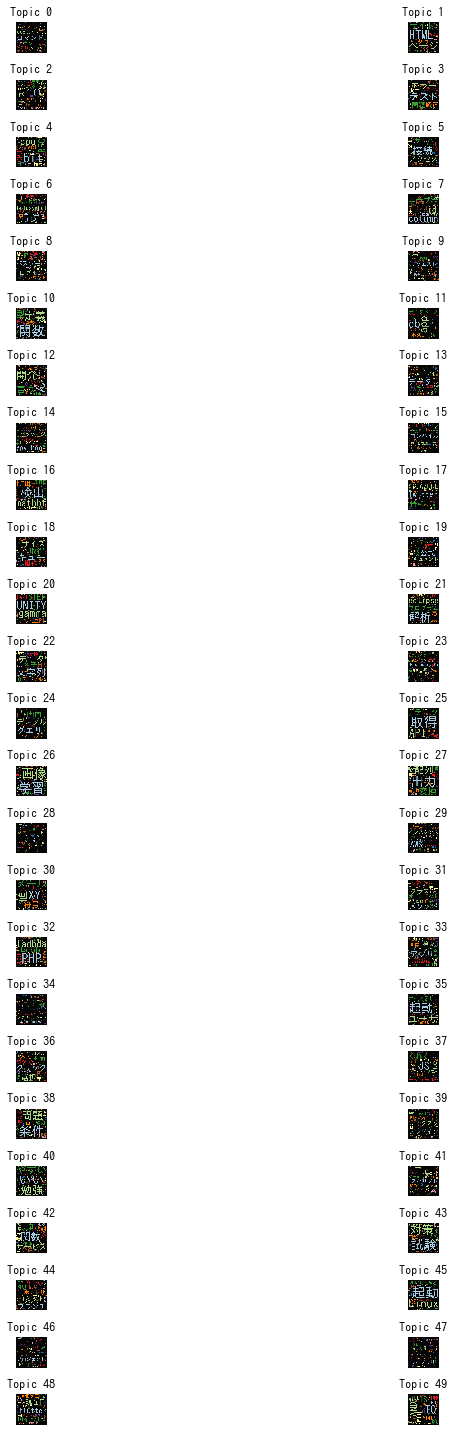

<Figure size 432x288 with 0 Axes>

In [0]:
# WordCloud

fig, axs = plt.subplots(ncols=2, nrows=math.ceil(lda.num_topics/2), figsize=(16,20))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

for i, t in enumerate(range(lda.num_topics)):

    x = dict(lda.show_topic(t, 30))
    im = WordCloud(
        font_path="/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf",
        background_color='black',
        color_func=color_func,
        max_words=4000,
        width=300, height=300,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))

# vis
plt.tight_layout()
plt.show()

# save as png
plt.savefig('wordcloud/wordcloud.png') 